Similar to LRG, we want to minimize the following expectation

$$\underset{\phi}{\min} \mathbb{E}_{q_\phi (x)}[f(x)]$$

We need to compute the gradient of $\mathbb{E}_{q_\phi (x)}[f(x)]$ w.r.t
$\phi$. We cannot draw samples from $q_\phi$ and take the empirical mean

$$\frac{1}{K} \sum_{i=1}^K f(x^{(i)})$$

because this expression does not contain/depend on $\phi$. The gradient of
this expression w.r.t $\phi$ is 0.

Let $p_Z(z)$ be a simple distribution, e.g. Gaussian. Suppose that there exist
 a deterministic function $g: \mathcal{Z} \rightarrow \mathcal{X}$ with
 parameter $\phi$, s.t.

$$x = g_\phi(z)$$

Replace $x$ with $g_\phi(z)$

\begin{eqnarray}
\mathbb{E}_{x \sim q_\phi(x)} \left[ f(x) \right] & = & \mathbb{E}_{z \sim p_Z(z)} \left[ f(g_\phi(z)) \right] \\
& \approx & \frac{1}{K} \sum_{i = 1}^K f(g_\phi(z^{(i)}))
\end{eqnarray}

We can differentiate the new approximation w.r.t $\phi$ because it still
appears in the approximation.

Reparameterization trick usually has much lower variance than Likelihood Ratio Grad
because:
- Unlike LRG where the derivative is the derivative of $q_\phi$ w.r.t $\phi$,
the derivative here is of $f(x)$ w.r.t $\phi$. This makes the optimization
much easier (see example below).
- There is no $\log q_\phi(x)$ term. This term is very big for high
dimensional distributions and contribute significantly to the variance of LRG.

Consider again the problem in LRG.
Minimize the following loss function:

\begin{eqnarray}
\mathcal{L} = \mathbb{E}_{x \sim \mathcal{N}(\mu, I)} \left[\left\lvert\left\lvert x - \left[ \begin{matrix} 5 \\ 5 \end{matrix} \right] \right\rvert\right\rvert_2^2 \right]
\end{eqnarray}

We reparametrize $x$ by $\epsilon \sim \mathcal{N}(0, I)$ as follow
$x = \mu + \epsilon$. The loss function becomes

\begin{eqnarray}
\mathcal{L} & = & \mathbb{E}_{\epsilon \sim \mathcal{N}(0, I)} \left[
\left\lvert\left\lvert \mu + \epsilon - \left[ \begin{matrix} 5 \\ 5 \end{matrix} \right]
\right\rvert\right\rvert_2^2 \right] \\
& \approx & \frac{1}{K} \sum_{i = 1}^K \left\lvert\left\lvert \mu + \epsilon^{(i)} - \left[ \begin{matrix} 5 \\ 5 \end{matrix} \right]
\right\rvert\right\rvert_2^2
\end{eqnarray}

Taking the derivative of $\mathcal{L}$ w.r.t. $\mu$

\begin{eqnarray}
\nabla_\mu \mathcal{L} = \frac{2}{K} \sum_{i = 1}^K \left( \mu + \epsilon^{(i)} - \left[ \begin{matrix} 5 \\ 5 \end{matrix} \right] \right)
\end{eqnarray}

Unlike the gradient obtained in LRG, this gradient always push $\mu$ toward
the target $\left[5 \ 5\right]^\top$.

In [28]:
import numpy as np
from matplotlib import pyplot as plt

mu = np.array([0, 0])
target = np.array([5, 5])
I = np.array([[1, 0], [0, 1]])


In [29]:
def reparameterize_grad(z, mu, target):
    grad = (mu + z - target).mean(axis=0)
    # print('mu', mu)
    # print('target', target)
    # print('grad', grad)
    return grad

def loss(z, target):
    return (np.linalg.norm(z - target, axis=1) ** 2).mean()

def train(mu, target, loss, lr, n_train, n_test, n_iter=10, viz=False):
    for it in range(n_iter):

        z = np.random.multivariate_normal(mean=[0, 0], cov=I, size=n_train)
        pmu = mu
        gradi = reparameterize_grad(z, mu, target)
        mu = mu - lr * gradi

        # visualization
        if viz:
            fig, ax = plt.subplots(1, 1, figsize=(5, 5))
            ax.set_xlim(-5, 6)
            ax.set_ylim(-5, 6)
            ax.scatter(z[:, 0], z[:, 1], c='b')

            ax.scatter(pmu[0], pmu[1], c='r', s=80, alpha=0.5)
            ax.scatter(mu[0], mu[1], c='r', s=80)
            ax.arrow(pmu[0], pmu[1], mu[0] - pmu[0], mu[1] - pmu[1], head_width=0.1, length_includes_head=True)
            ax.scatter(target[0], target[1], c='g', s=80)

        z_test = np.random.multivariate_normal(mean=mu, cov=I, size=n_test)
        lossi = loss(z_test, target)
        print(it, lossi)

0 42.60555597115997
1 33.471360305040626
2 27.611649723948787
3 22.060702104521994
4 17.64140030450984
5 15.959467267866046
6 12.59636187380943
7 11.107675932637376
8 9.053125514996179
9 8.56499972826725
10 6.38100071338148
11 4.343743618503335
12 5.234583494346912
13 4.149172020612112
14 4.039977858685292
15 3.087747118184202
16 2.492480362749751
17 3.0964524227185
18 2.7691770626854373
19 2.1024839987610373
20 1.955950403436063
21 2.491075940748296
22 1.9328992698524363
23 2.2264120522039246
24 1.9944461707978776
25 2.6329215363578684
26 2.398344156785879
27 2.2707634444251985
28 2.201147145994655
29 2.31234730163247
30 1.88380764284774
31 2.2619019379196903
32 2.0370209549528457
33 1.9667401891872498
34 1.6573141889838832
35 2.1330493575461276
36 2.089123787514386
37 1.79931500610227
38 1.870713155364058
39 1.8987733768231438
40 1.9722258930980843
41 2.310162495559672
42 2.111991371234554
43 2.1577100981747592
44 1.7440624594867489
45 1.7787371845101012
46 2.008247864120574
47 2.055

<ipython-input-29-b711879efefa>:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, figsize=(5, 5))


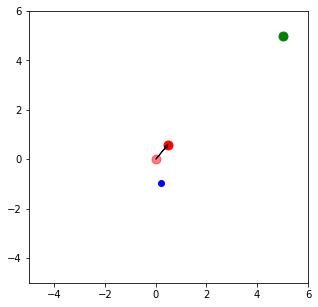

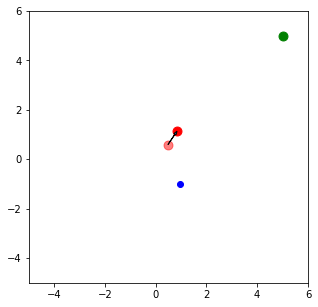

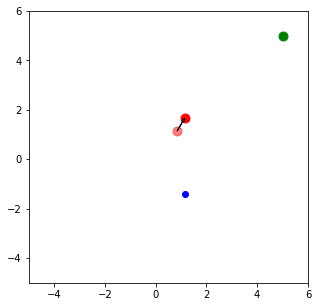

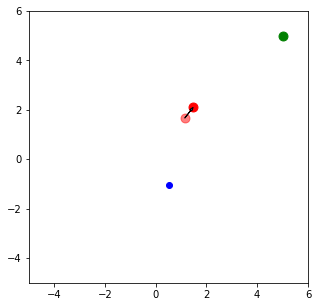

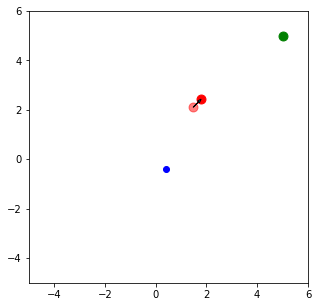

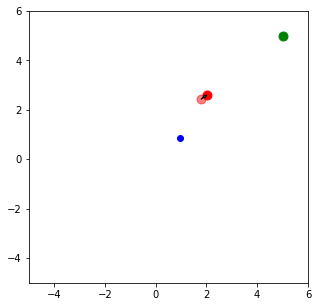

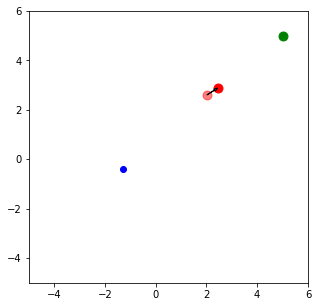

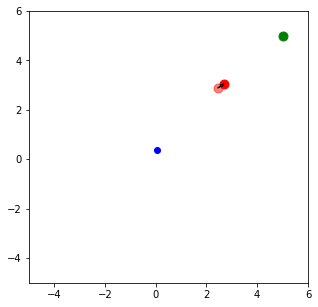

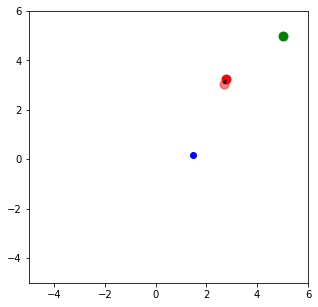

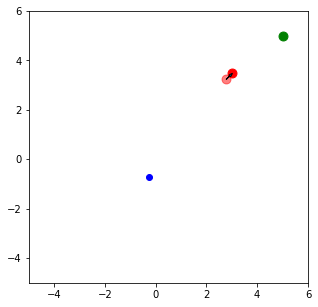

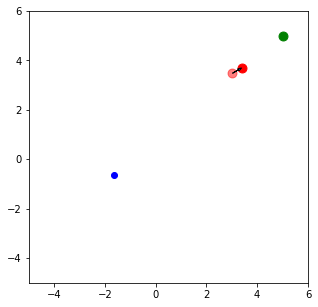

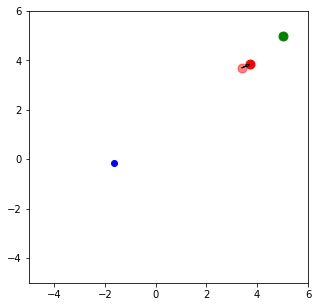

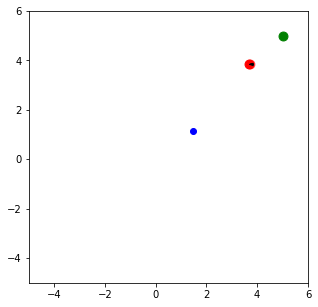

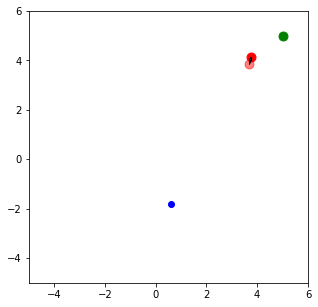

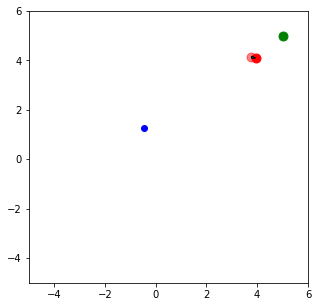

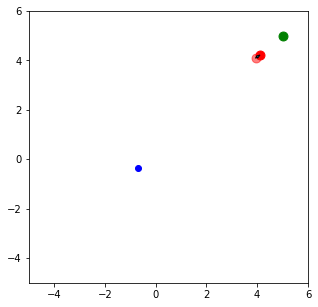

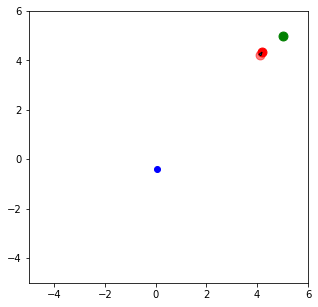

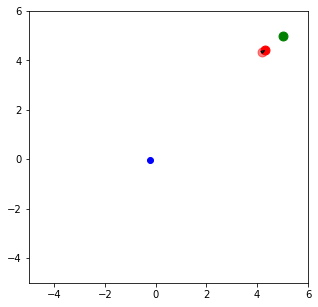

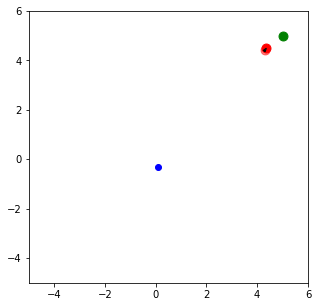

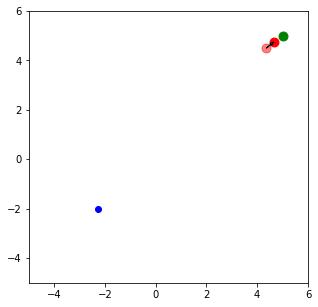

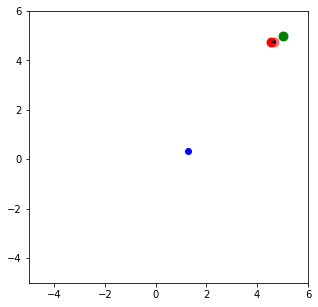

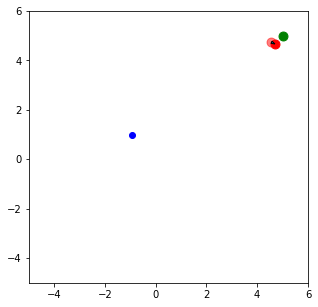

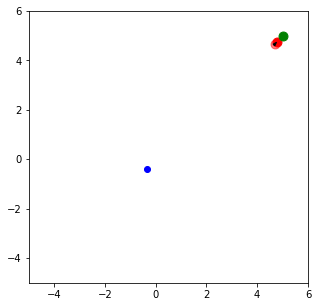

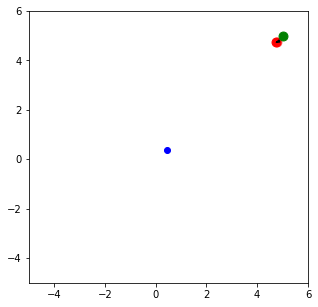

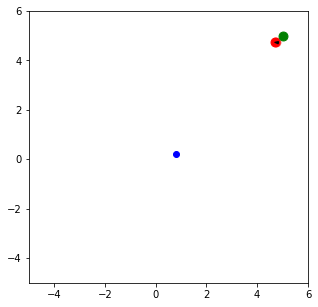

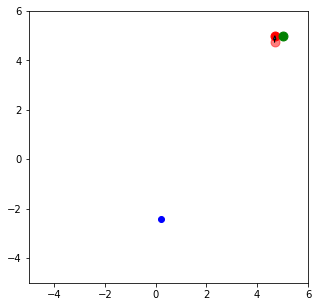

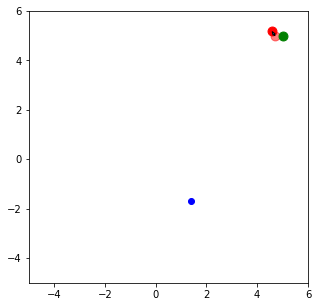

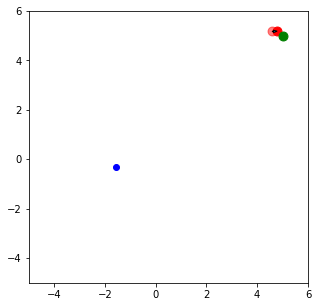

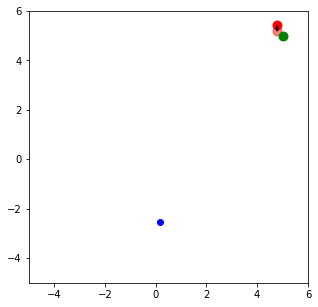

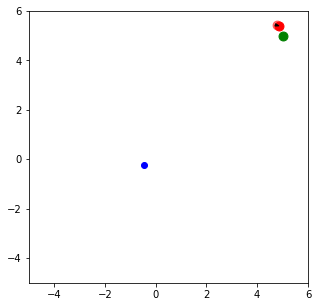

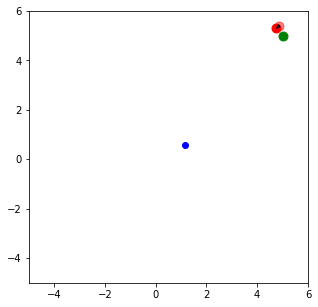

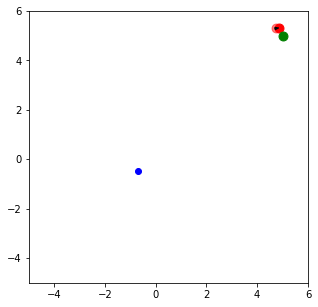

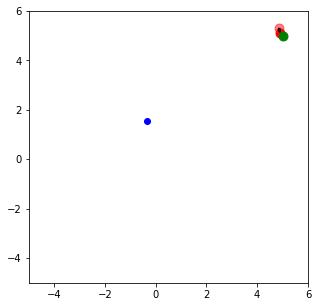

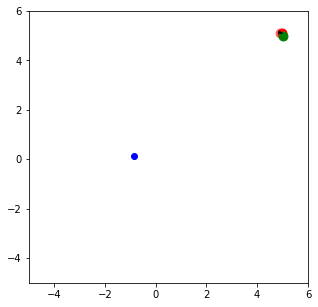

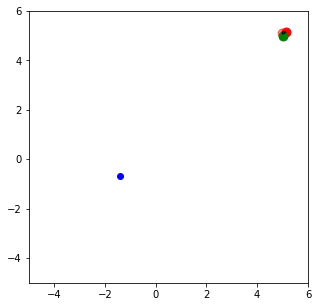

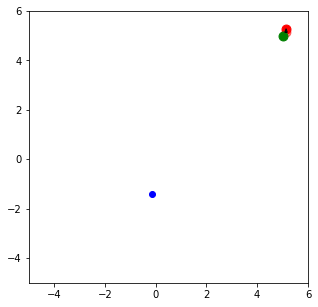

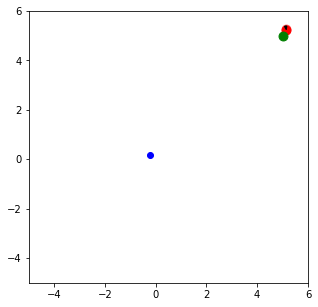

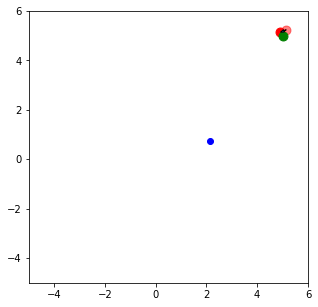

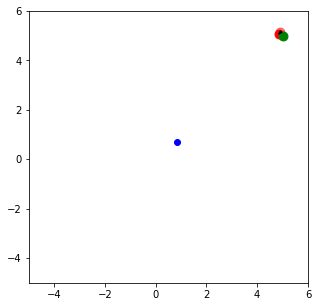

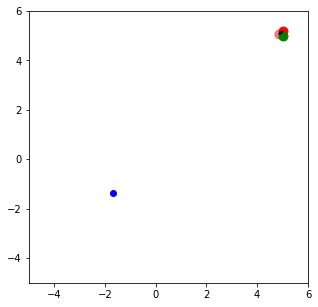

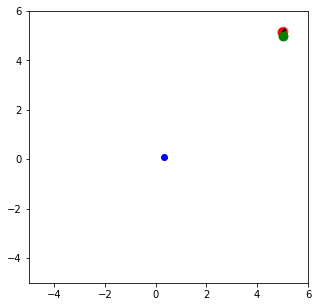

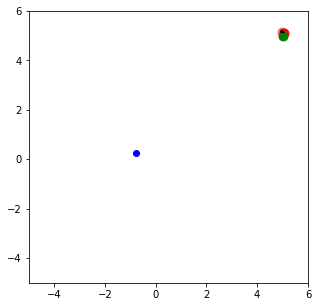

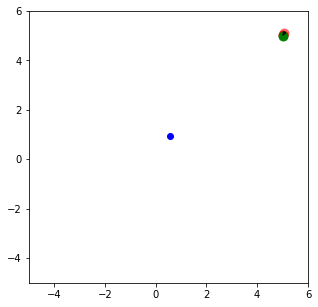

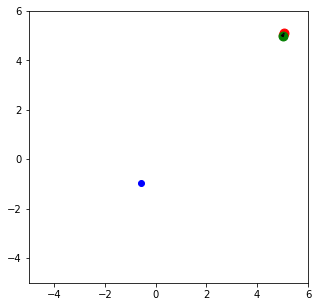

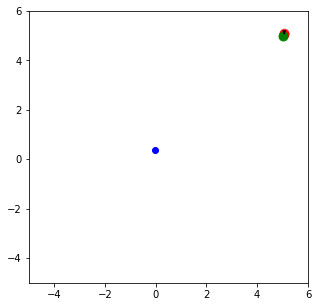

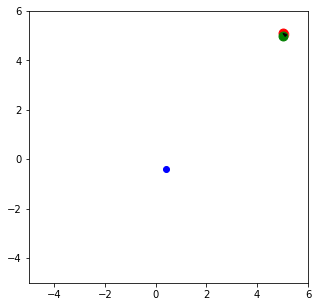

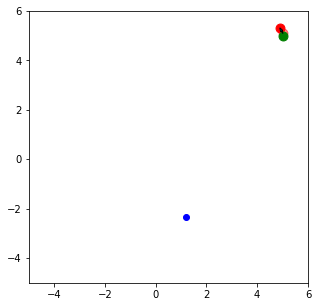

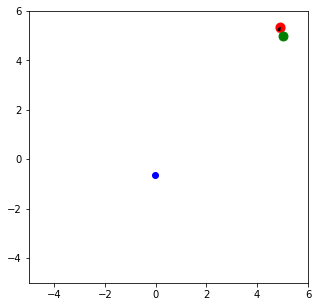

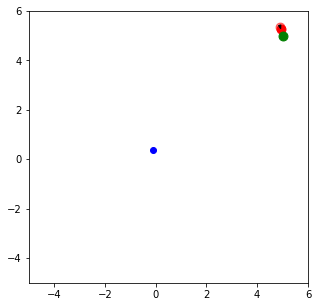

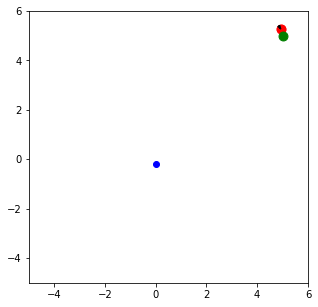

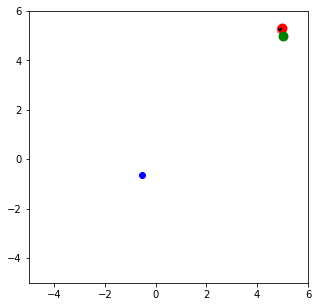

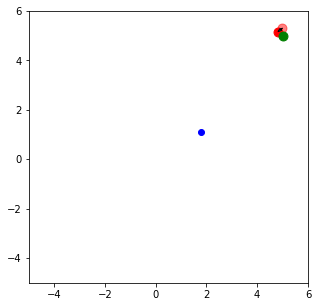

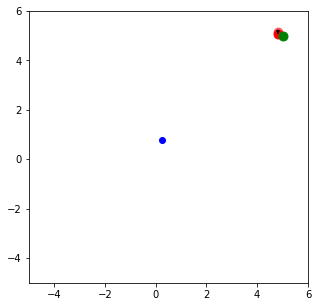

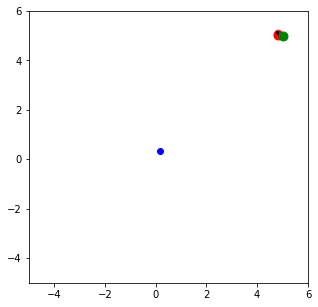

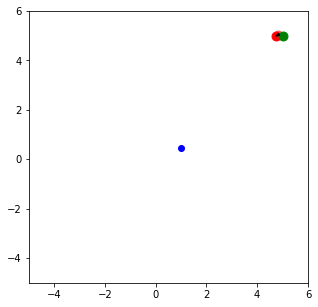

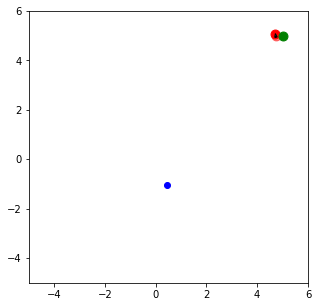

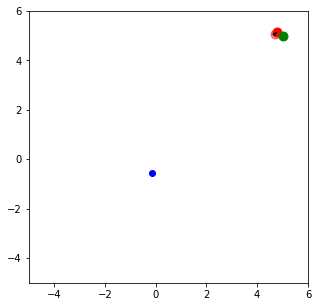

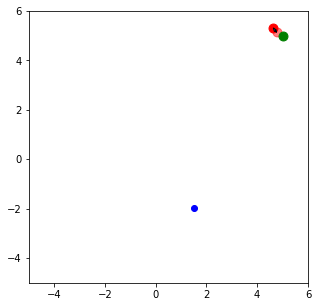

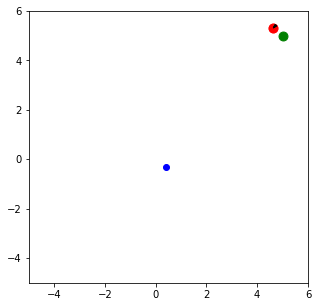

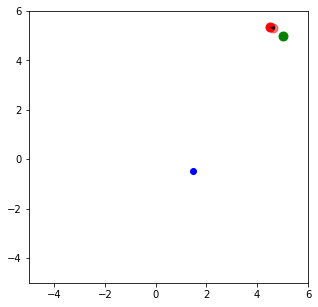

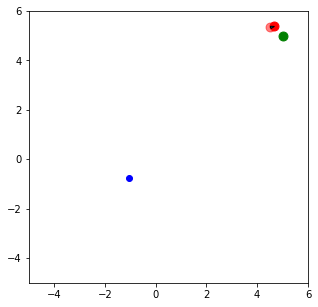

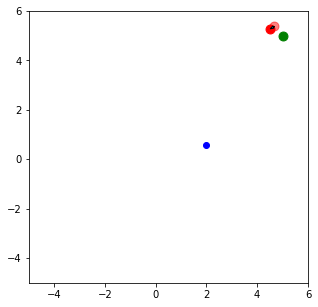

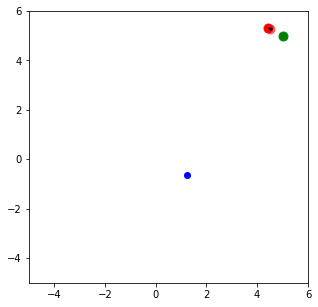

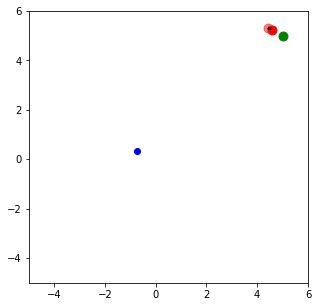

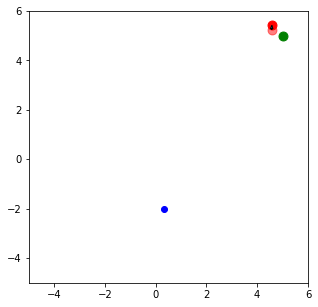

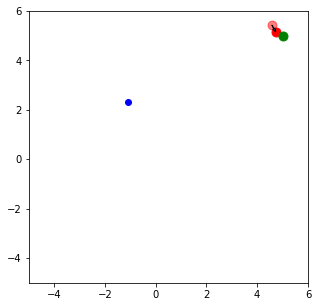

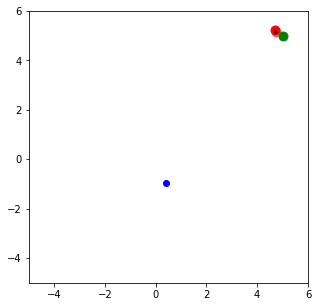

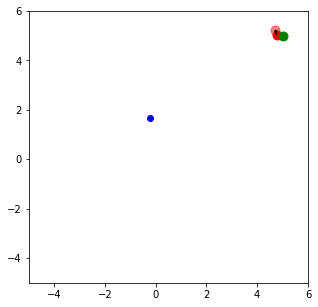

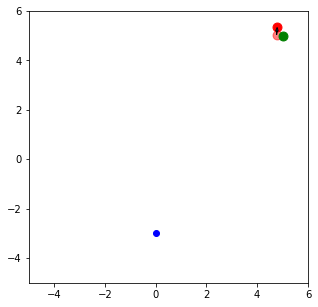

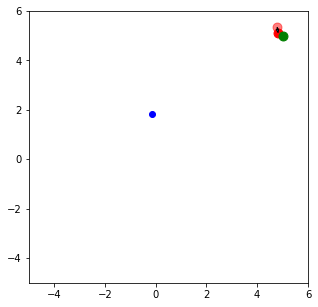

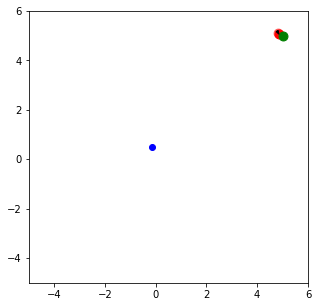

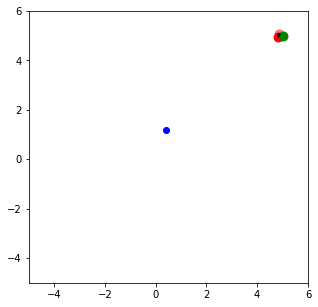

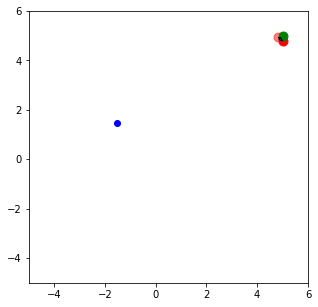

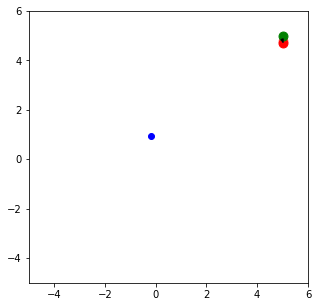

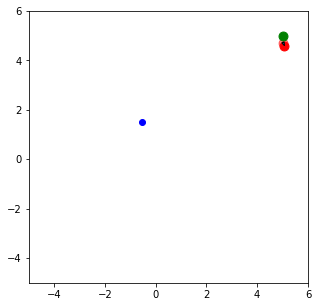

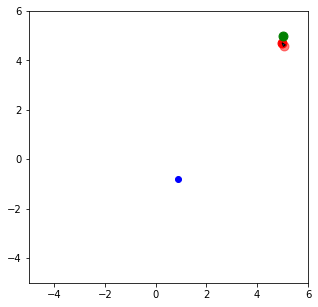

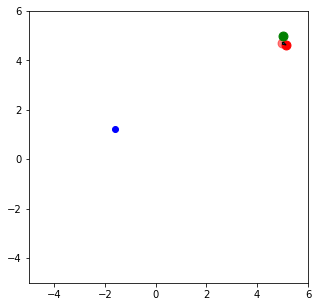

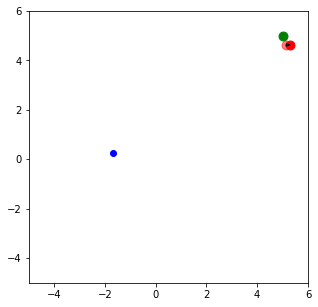

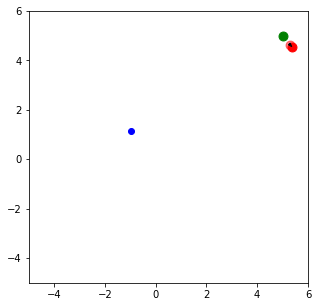

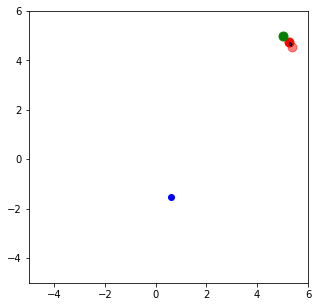

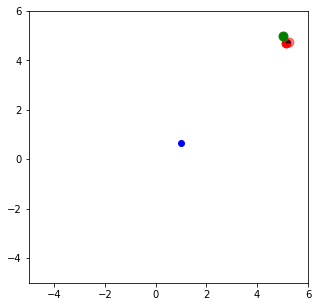

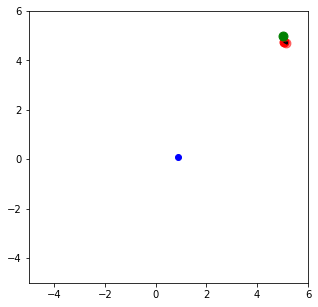

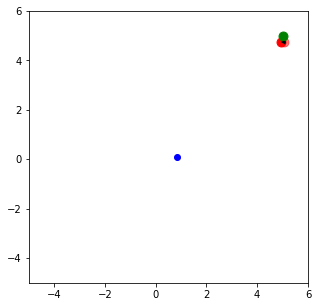

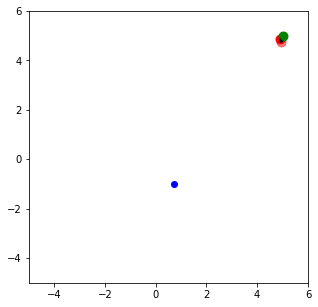

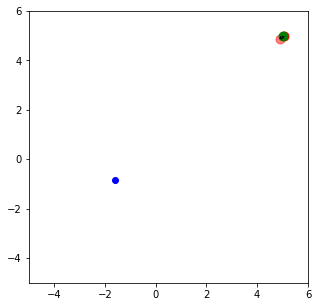

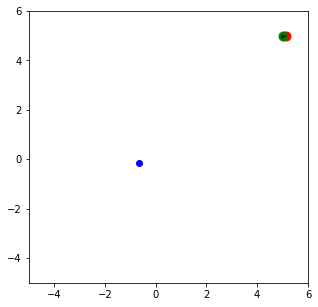

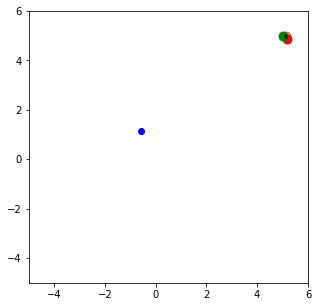

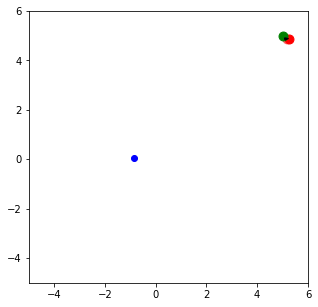

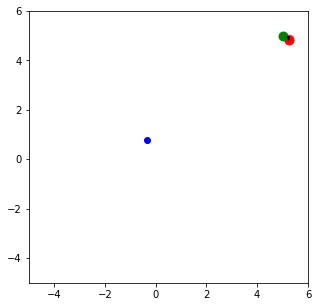

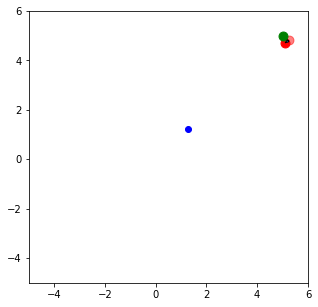

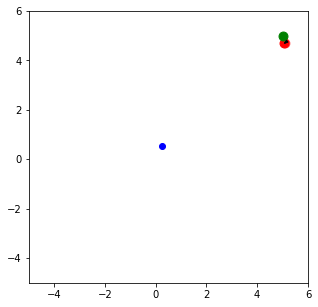

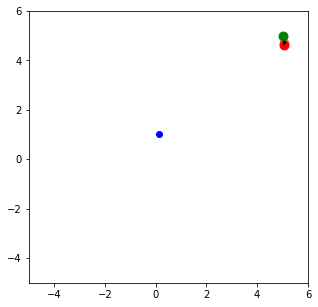

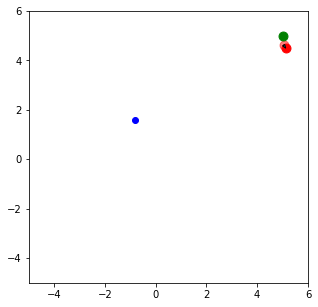

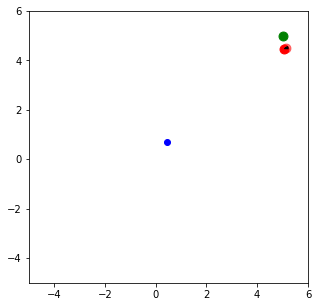

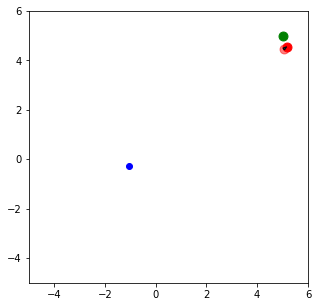

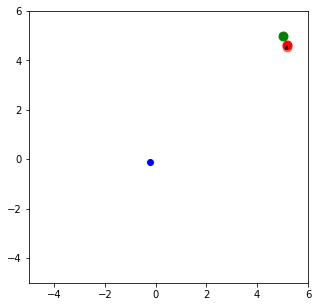

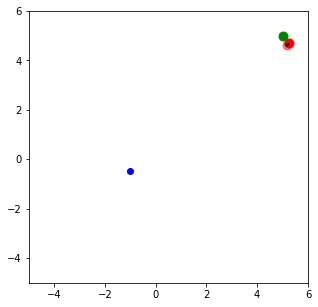

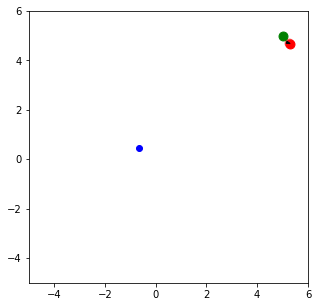

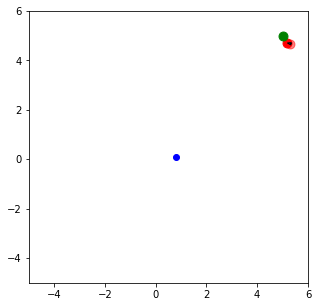

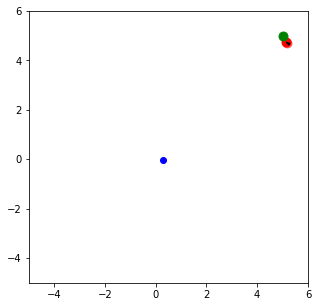

In [30]:
train(mu, target, loss, lr=0.1, n_train=1, n_test=100, n_iter=100, viz=True)